###  A- Criterias for evaluating the adjustment of the statistical models



**chi2**

A chi-squared test for independence tests if there is a significant relationship between two or more groups of categorical data from the same population. The null hypothesis for this test is that there is no relation. It is one of the most commonly used tests in statistics.

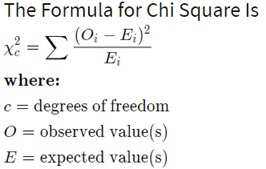

$X_c^2$ =  chi-square value



**The following is the chi-square distribution table:**
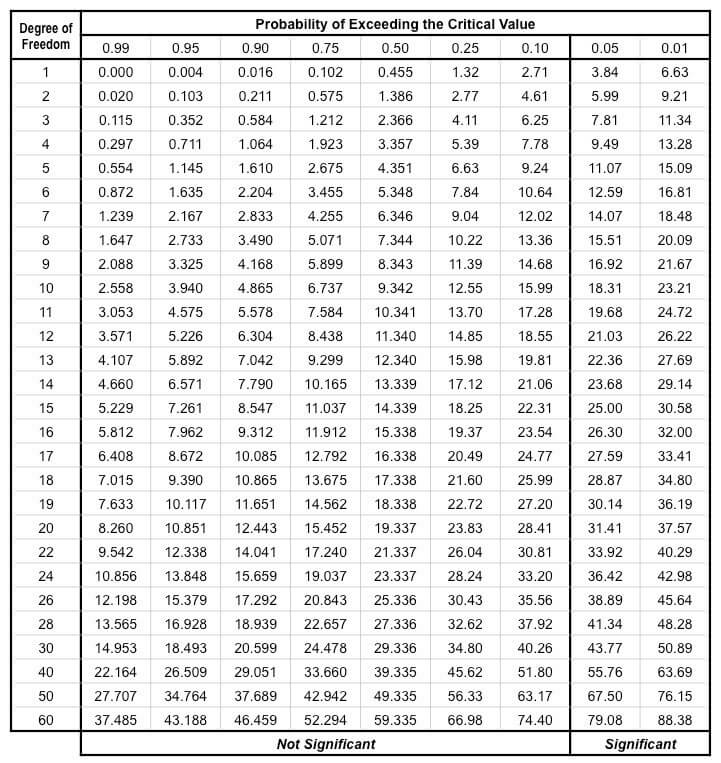





**uses**:

Chi-square is most commonly used by researchers who are studying survey response data because it applies to categorical variables. Demography, consumer and marketing research, political science, and economics are all examples of this type of research.

**Chi-Square P-Values**

Here P denotes the probability; hence for the calculation of p-values, the Chi-Square test comes into the picture. The different p-values indicate different types of hypothesis interpretations. 


- P <= 0.05 (Hypothesis interpretations are rejected)
- P>= 0.05 (Hypothesis interpretations are accepted) 


The concepts of probability and statistics are entangled with Chi-Square Test. Probability is the estimation of something that is most likely to happen. Simply put, it is the possibility of an event or outcome of the sample. Probability can understandably represent bulky or complicated data. And statistics involves collecting and organising, analysing, interpreting and presenting the data. 

In [ ]:
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
import numpy as np

In [ ]:
#load data
from google.colab import drive
drive.mount('/content/drive')
sample  = pd.read_csv('/content/drive/My Drive/datasetMathAI/sample1.csv')
sample1 = sample.drop('Unnamed: 0', axis=1)
df = sample1 


Mounted at /content/drive


Step 1: Define the Hypothesis

H0: There is no link between age and heart disease.

H1: There is a link between age and heart disease.

Step 2: Calculate the Expected Values

Now you will calculate the expected value.

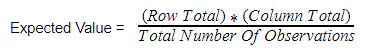





**Implementation in python**

In [ ]:
from scipy.stats import chisquare

# Create the observed values from our sample
observed =sample1[sample1.target==0]['age']

# Create the expected values for cases with heart disease

expected = sample1[sample1.target==0]['age'].mean()
# Perform the chi-squared test
chi2, p = chisquare(observed, f_exp=expected)

# Print the results
print("Chi-Squared Statistic: ", chi2)


Chi-Squared Statistic:  22.82875816993464


To have a more accurate p-value it is better to use automated calculation than an F-table of critical values

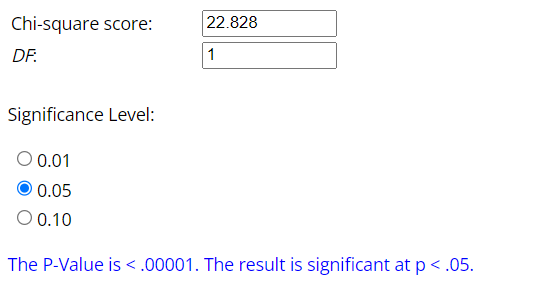

P-value is 0.00183(p < 0.05);means we can reject the null hypothesis Ho

Step 3: Calculate (O-E)2 / E for Each Cell in the Table
Now you will calculate the (O - E)2 / E for each cell in the table.

Where

O = Observed Value

E = Expected Value






In [ ]:
#another calculation using maths
Observed_Value0=sample1[sample1.target == 0]['age']
x0=((Observed_Value0-expected)**2)/expected
print(x0)

#chi2

0     0.169030
1     0.399095
4     0.451383
6     0.137657
10    4.822624
13    3.745500
21    0.057919
23    0.012167
27    0.869683
30    1.129814
31    0.000402
60    5.600402
65    0.643539
68    0.137657
71    0.643539
75    0.293213
77    0.000402
80    1.129814
85    0.169030
86    0.137657
88    0.796481
89    0.251383
90    0.399095
92    0.012167
95    0.022624
97    0.796481
Name: age, dtype: float64




Step 4: Calculate the Test Statistic X2

X2  is the sum of all the values in the last table


In [ ]:
#X2  is the sum of all the values in the last table
df0=x0.sum()
print("X2 of patients with heart disease is",df0)

X2 of patients with heart disease is 22.82875816993464


**RMSEA The Root Mean Square Error of Approximation**

The RMSEA (Steiger, 1990; Browne and Cudeck, 1993) provides a measure of lack of fit in the population with an adjustment for the parsimony of the model. RMSEA attempts to estimate the error of approximation of the model in the population apart from the error of estimation due to sampling error. The sample ML fitting function value is a biased estimator of the population fitting function value. A less biased estimator is obtained by Equation (9) (MacCallum et al., 1996).

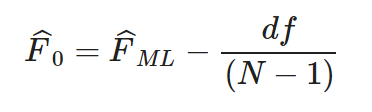     (9)


**Root Mean Square Error of Approximation (RMSEA) Index**

RMSEA is a measure of lack of fit in the population per degree of freedom. From Equation (9), RMSEA is obtained by

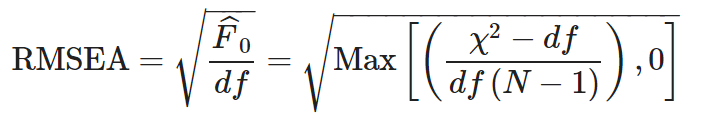  (10)


χ² : chi-square value 

df : degree of freedom

N : population/sample size

**Level-specific RMSEAs**

As mentioned earlier, RMSEA is a measure of lack of fit in population per df. An unbiased estimator of the level-specific fitting function value in the population would be desirable level-specific RMSEA. The ML fitting function is rewritten as

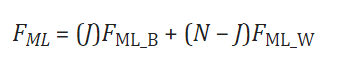

where :
- FML_B captures the discrepancy between model and data in the level-2 covariance structure, 
-  FML_W captures the discrepancy in the level-1 covariance structure. 
Using Equations (9) and (10)

 RMSEAPS_B can be obtained by

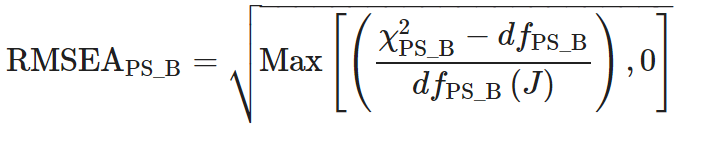

as a less biased estimator of the lack of fit at level 2 in population. Likewise, 

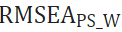 can be obtained by 
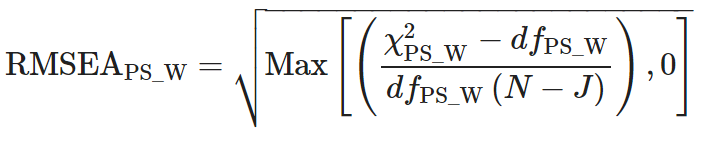

as a less biased estimator of the lack of fit at level 1 in population.

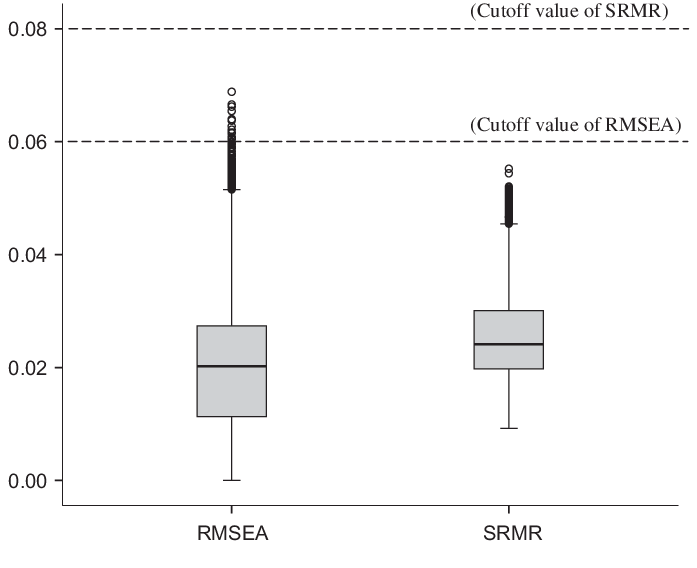

Box plot for Root Mean Square Error of Approximation (RMSEA) and Standardized Root-MeanSquare Residual (SRMR) across all simulation conditions.

- Root mean square error or root mean square deviation is one of the most commonly used measures for evaluating the quality of predictions. It shows how far predictions fall from measured true values using Euclidean distance.

**Implementation in python**

In [ ]:
import math
sample_size = len(sample1)
RMSEA=math.sqrt((df0-20)/(20*(sample_size-1)))
print("RMSEA = ",RMSEA) 


RMSEA =  0.03779769493489296


RMSEA value smaller than 0.05, it can be said to
indicate a convergence fit to the analyzed data of the model while it indicates a fit
close to good when it produces a value between 0.05 and 0.08. A RMSEA value
falling between the range of 0.080.10 is stated to indicate a fit which is neither
good nor bad

*2- MAE,AIC(me)*

**Mean absolute error (MAE)** : is a measure of how close predictions are to the eventual outcomes. 

> 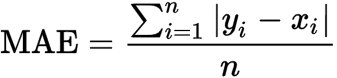

image.png	=	mean absolute error

image.png =	prediction

image.png =	true value

image.png =	total number of data points

**Implementation in python**

In [ ]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))
mae()

In [ ]:
#@title
%%html
<link rel="stylesheet" type="text/css"
    href="https://cdn.rawgit.com/dreampulse/computer-modern-web-font/master/fonts.css">

<style type="text/css">
div{font-family: "Computer Modern Sans";
font-size:16px;
}
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-bottom-width:1px;border-color:black;border-style:solid;border-top-width:1px;border-width:0px;
   font-family: "Computer Modern Sans", sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-bottom-width:1px;border-color:black;border-style:solid;border-top-width:1px;border-width:0px;
   font-family: "Computer Modern Sans", sans-serif;font-size:15px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-y14w{border-color:inherit;font-family: "Computer Modern Sans"!important;font-size:15px;text-align:left;vertical-align:top}
.tg .tg-rxs6{border-color:#343434;font-family: "Computer Modern Sans"!important;font-size:15px;font-weight:bold;text-align:left;
  vertical-align:top}
.tg .tg-w7iv{background-color:#efefef;border-color:inherit; font-family: "Computer Modern Sans"!important;font-size:15px;text-align:left;
  vertical-align:top}
.tg .tg-ogqf{border-color:#000000; font-family: "Computer Modern Sans"!important;font-size:15px;font-weight:bold;text-align:left;
  vertical-align:top}
</style>
<div>
 <strong> Main use:</strong>
 <ol type="a">
  <li>Model evaluation</li>
  <li>Data exploration</li>
  <li>Model tuning</li>
  <li>Forecasting</li>
  <li>Outlier detection</li>
  </ol>  
</div>
<div>
  <strong> Value criteria:</strong><br>
  <ul>☛ Across models there is no ideal value for MAE as it is returned on the same scale that you are predicting, so an ideal MAE value for one dataset will not be the same for another.</ul> 
    <ul> ☛ For the same dataset the lower the MAE score the better</ul>
  <br>
</div>
<table class="tg">
<thead>
  <tr>
    <th class="tg-ogqf">Benefits</th>
    <th class="tg-rxs6">Drawbacks</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-w7iv">Easy to understand and interpret, as it provides a direct measure of the average magnitude of the errors in a set of predictions.</td>
    <td class="tg-w7iv">Does not take into account the direction of the errors, only the magnitude. This means that large negative errors will cancel out large positive errors and vice versa.</td>
  </tr>
  <tr>
    <td class="tg-y14w">Insensitive to outliers and does not require a normal distribution of errors, making it a robust measure of accuracy.</td>
    <td class="tg-y14w">Does not penalize large errors as much as other measures like Mean Squared Error or Root Mean Squared Error, making it less sensitive to large errors.</td>
  </tr>
  <tr>
    <td class="tg-w7iv">Used in both linear and nonlinear regression models and is applicable to a wide range of data types.</td>
    <td class="tg-w7iv">Does not provide a clear indication of model performance for high-dimensional data sets, where the absolute values of errors may be less meaningful.</td>
  </tr>
  <tr>
    <td class="tg-y14w">Provides a consistent and coherent measure of model performance that can be used to compare different models or tuning parameters.</td>
    <td class="tg-y14w">Cannot be used for evaluating classification models, as it only applies to regression models.</td>
  </tr>
</tbody>
</table>

Benefits,Drawbacks
"Easy to understand and interpret, as it provides a direct measure of the average magnitude of the errors in a set of predictions.","Does not take into account the direction of the errors, only the magnitude. This means that large negative errors will cancel out large positive errors and vice versa."
"Insensitive to outliers and does not require a normal distribution of errors, making it a robust measure of accuracy.","Does not penalize large errors as much as other measures like Mean Squared Error or Root Mean Squared Error, making it less sensitive to large errors."
Used in both linear and nonlinear regression models and is applicable to a wide range of data types.,"Does not provide a clear indication of model performance for high-dimensional data sets, where the absolute values of errors may be less meaningful."
Provides a consistent and coherent measure of model performance that can be used to compare different models or tuning parameters.,"Cannot be used for evaluating classification models, as it only applies to regression models."


**Akaike information criterion(AIC)** : is a measure of how close predictions are to the eventual outcomes.
> 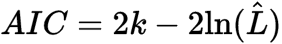

image.png =	Akaike information criterion

image.png =	number of estimated parameters in the model

image.png =	maximum value of the likelihood function for the model



In [ ]:
#@title
%%html
<link rel="stylesheet" type="text/css"
    href="https://cdn.rawgit.com/dreampulse/computer-modern-web-font/master/fonts.css">

<style type="text/css">
div{font-family: "Computer Modern Sans";
font-size:16px;
}
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-bottom-width:1px;border-color:black;border-style:solid;border-top-width:1px;border-width:0px;
   font-family: "Computer Modern Sans", sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-bottom-width:1px;border-color:black;border-style:solid;border-top-width:1px;border-width:0px;
   font-family: "Computer Modern Sans", sans-serif;font-size:15px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-y14w{border-color:inherit;font-family: "Computer Modern Sans"!important;font-size:15px;text-align:left;vertical-align:top}
.tg .tg-rxs6{border-color:#343434;font-family: "Computer Modern Sans"!important;font-size:15px;font-weight:bold;text-align:left;
  vertical-align:top}
.tg .tg-w7iv{background-color:#efefef;border-color:inherit; font-family: "Computer Modern Sans"!important;font-size:15px;text-align:left;
  vertical-align:top}
.tg .tg-ogqf{border-color:#000000; font-family: "Computer Modern Sans"!important;font-size:15px;font-weight:bold;text-align:left;
  vertical-align:top}
</style>
<div>
 <strong> Main use:</strong>
 <ol type="a">
  <li>Model selection</li>
  <li>Model evaluation</li>
  <li>Feature selection</li>
  <li>Model comparison</li>
  <li>Data exploration</li>
  </ol>  
</div>
<div>
  <strong> Value criteria:</strong><br>
  <ul>☛ The model with the lowest AIC offers the best fit.</ul> 
  <br>
</div>
<table class="tg">
<thead>
  <tr>
    <th class="tg-ogqf">Benefits</th>
    <th class="tg-rxs6">Drawbacks</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-w7iv">Provides a means for model selection by penalizing models with a larger number of parameters. This helps to prevent overfitting by selecting simpler models with fewer parameters.</td>
    <td class="tg-w7iv">May prefer models that have too many parameters, as it only penalizes the complexity of the model linearly.</td>
  </tr>
  <tr>
    <td class="tg-y14w">Can be used with any type of probability distribution for the data, and it doesn't require the estimation of the true model.</td>
    <td class="tg-y14w">Does not take into account the sample size of the data. This means that a model may have a lower AIC value even if it is a poor fit to the data, if the sample size is small.</td>
  </tr>
  <tr>
    <td class="tg-w7iv">Can be used to compare different models even when they have different numbers of parameters.</td>
    <td class="tg-w7iv">Does not provide a probability or likelihood for the model, it's a criterion for comparison.</td>
  </tr>
  <tr>
    <td class="tg-y14w">It is easy to calculate and easy to understand</td>
    <td class="tg-y14w">Does not take into account the uncertainty of the estimates, so it does not reflect the true goodness of fit of the model.</td>
  </tr>
</tbody>
</table>

Benefits,Drawbacks
Provides a means for model selection by penalizing models with a larger number of parameters. This helps to prevent overfitting by selecting simpler models with fewer parameters.,"May prefer models that have too many parameters, as it only penalizes the complexity of the model linearly."
"Can be used with any type of probability distribution for the data, and it doesn't require the estimation of the true model.","Does not take into account the sample size of the data. This means that a model may have a lower AIC value even if it is a poor fit to the data, if the sample size is small."
Can be used to compare different models even when they have different numbers of parameters.,"Does not provide a probability or likelihood for the model, it's a criterion for comparison."
It is easy to calculate and easy to understand,"Does not take into account the uncertainty of the estimates, so it does not reflect the true goodness of fit of the model."


In [ ]:
#@title
%%HTML
<link rel="stylesheet" type="text/css"
    href="https://cdn.rawgit.com/dreampulse/computer-modern-web-font/master/fonts.css">
<style>
.alert {
  font-family: "Computer Modern Sans", sans-serif;
  padding: 20px;
  background-color: #A2331B; /* Red */
  color: white;
  font-size:16px;
  margin-right:30%;
  margin-bottom: 15px;  }
</style>
<div class="alert"> 
 ! AIC should be used in conjunction with other tools such as cross-validation and visualization of the residuals, rather than as the sole criterion for model selection
</div>

**Implementation in python**

In [ ]:
import statsmodels.formula.api as smf


# Specify the formula for the model
formula1 = 'target ~ cp + trestbps + chol + fbs + restecg + exang + oldpeak + slope '
formula2 = 'target ~ age + sex + thalach '

def aic(formula,dataset):
  # Fit the model to the data using the OLS method
  model = smf.ols(formula=formula, data=dataset).fit()

  # Print the AIC of the model
  print(model.aic)

aic(formula1,sample1) 
aic(formula2,sample1)   

92.97866468221426
88.65481489435635




---



**Criteria for measuring model fit in SEM (Structural Equation Modeling)**

Measures of fit in SEM provide information about how well the model fits the data. fit statistics can be divided into **absolute** and **relative/comparative** fit indices. 

**Absolute fit indices**

Absolute fit indices determine how well an a priori model fits the sample data and demonstrates which proposed model has the most superior fit. These measures provide the most fundamental indication of how well the proposed theory fits the data.
Included in this category are the Chi-Squared test, RMSEA, **GFI**, AGFI, the RMR and the SRMR.

**The Goodness of Fit Index (GFI)**

A numerical summary of the discrepancy between the observed values and the values expected under a statistical model.

Measures the proportion of variance accounted for by the estimated population covariance. It doesn’t compare to a baseline or null hypothesis, instead, it can be generalized as

\begin{align}
       GFI = 1- \frac{Vresid}{Vtotal} 
    \end{align}



Where

**V residual** is the variance that isn’t explained by the model, and 

**V total** is the total variance in the covariance matrix.




**Using Model Residuals : RSS,ESS and TSS**

$Y_i= E(Y_i | X_i)+ ∈_i$ where $ E(Y_i | X_i)= β_0+β_1 X_i  ∈θ $

is the explainable, systematic, component of our model and  
ϵi is the random, unsystematic, unexplainable component of our model.

In practical application, we do not observe the true systematic and the true random components, but we can use the OLS to estimate the unknown parameters.

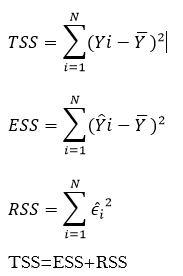



R-squared, $R^2$

\begin{align}
       R^2 = \frac{ESS}{TSS} =1- \frac{RSS}{TSS} 
    \end{align}


The closer $R^2$ is to 1, the closer the sample values of $Y_i$ are to the fitted values Ŷ of our regression.

TSS : Total Sum of Squares

ESS : Explained Sum of Squares

RSS : Residual Sum of Squares

**Implementation in Python**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
#estimates the parameters of the function beta0 beta1, log likelihood
sample = sample1


def fitReg(formula,data):
  linear_model = ols(formula,
                    data=data).fit()
  return linear_model



In [ ]:
#this function plots the residual, y_predicted vs y_actual

# fit simple linear regression model
def plotResReg(colname,model):
  # display model summary
  #print(model.summary())
    
  # modify figure size
  fig = plt.figure(figsize=(14, 8))
    
  # creating regression plots
  fig = sm.graphics.plot_regress_exog(model,colname,
                                    fig=fig)



In [ ]:
#calculates R-squared
def rSquare(y,model):
  rss=np.sum((y-model.fittedvalues)**2)
  tss=np.sum((np.array(y)-np.mean(y))**2)
  r=1-(rss/tss)
  return r

In [ ]:

#plot TSS ESS RSS
def plotTER(x1,y1,model):
  plt.figure(num = 0, figsize = (10, 8))
  plt.plot(x1, y1 - np.mean(y1), linestyle = "None", marker = "o", 
          color = "black", label = "$Y_i - \\overline{Y}_i$")
  plt.plot(x1, model.fittedvalues - np.mean(y1), linestyle = "None", marker = "o", 
          color = "blue", label = "$\\widehat{Y}_i - \\overline{Y}_i$")
  plt.plot(x1, model.resid, linestyle = "None", marker = "o", 
          color = "red", label = "$\\widehat{\\epsilon}_i$")
  plt.legend()         
  plt.show() 



In [ ]:
#we define two models one with 3 variables, the other with 1 variables
#to see the difference between the models (r-squared, cfi, log likelihood)
full_formula='chol ~ age + trestbps + thalach'
reduced_formula='chol ~ age'
data=sample
y=sample['chol']


full_model=fitReg(full_formula,sample)
reduced_model=fitReg(reduced_formula,sample)

In [ ]:
print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   chol   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     5.233
Date:                Mon, 16 Jan 2023   Prob (F-statistic):            0.00218
Time:                        22:24:19   Log-Likelihood:                -520.43
No. Observations:                 100   AIC:                             1049.
Df Residuals:                      96   BIC:                             1059.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     77.9859     58.427      1.335      0.1

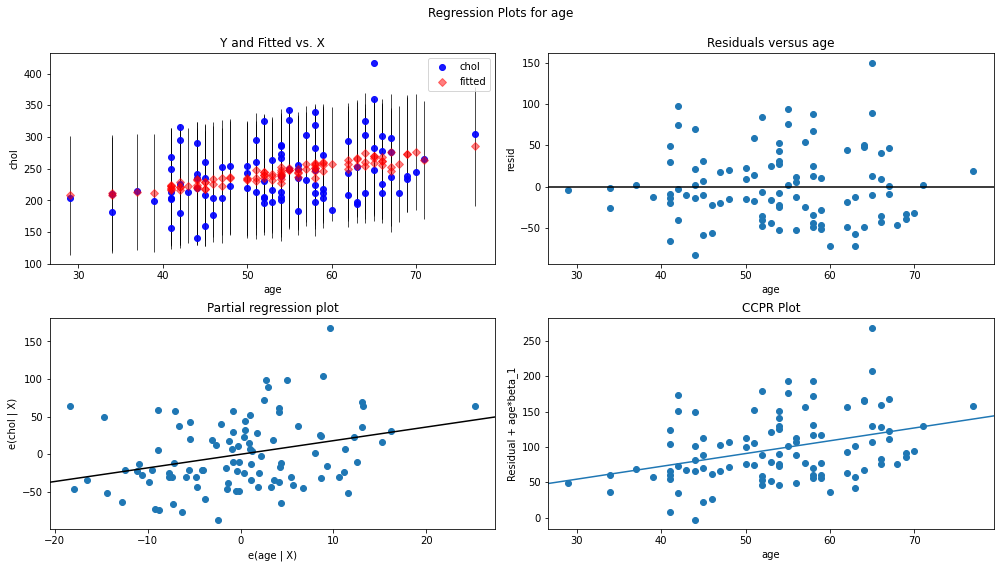

In [ ]:
#plot y_actual and y_predicted
plotResReg('age',full_model)

In [ ]:
print(reduced_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   chol   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     13.76
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           0.000345
Time:                        22:24:29   Log-Likelihood:                -521.44
No. Observations:                 100   AIC:                             1047.
Df Residuals:                      98   BIC:                             1052.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    149.2094     25.675      5.811      0.0

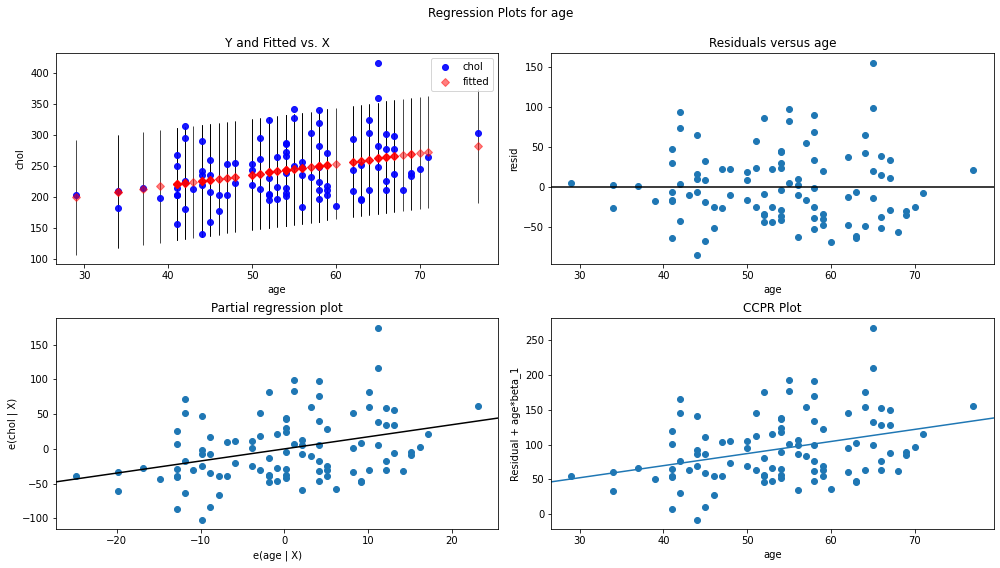

In [ ]:
plotResReg('age',reduced_model)

In [ ]:
#more r-squared is higher the better the model fits the data
#in our case r-squared of reduced model=0.123 while r-squared of full model=0.141
print(rSquare(y,full_model))
print(rSquare(y,reduced_model))

0.1405500177586928
0.12309768331552551


------

**log likelihood** is a way to measure the goodness of fit for a model. The higher the value of the log-likelihood, the better a model fits a dataset.

The log-likelihood value for a given model can range from negative infinity to positive infinity. The actual log-likelihood value for a given model is mostly meaningless, 
but it’s useful for comparing two or more models.

adding more predictor variables to a model will almost increase the log-likelihood

To compare models with different numbers of predictor variables, **likelihood-ratio test** can be used 

**Using likelihood ratio test**

it's a way to measure the goodness of fit of two nested regression models.

nested model if it contains less than the global number of predictors variables

To determine if these two models are significantly different, we can perform a likelihood ratio test which uses the following null and alternative hypotheses:

H0: The full model and the nested model fit the data equally well. Thus, you should use the nested model.

HA: The full model fits the data significantly better than the nested model. Thus, you should use the full model.


to calculate the likelihood ratio test  LRT

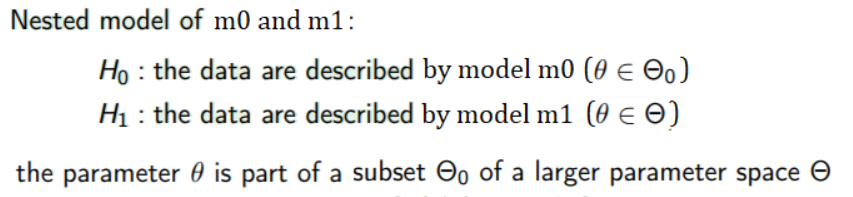

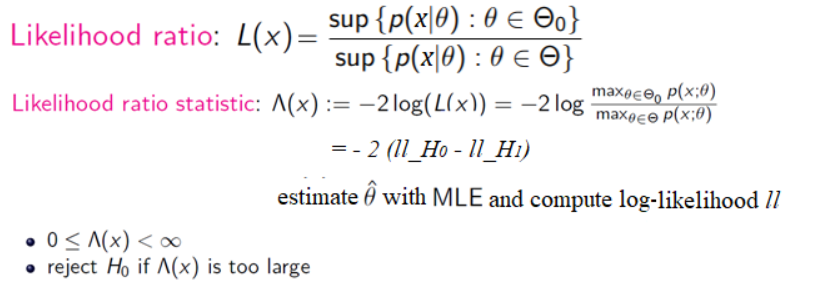

**Implementation in python**

In [ ]:
from scipy.stats.distributions import chi2
def loglikelihood(full_model,nested_model):
  full_modellog=full_model.llf
  nested_modellog=nested_model.llf
  return full_modellog,nested_modellog



In [ ]:
def likelihoodRatioTest(full_ll,reduced_ll):
  LR_statistic = -2*(reduced_ll-full_ll)
  print(LR_statistic)
  p = chi2.sf(LR_statistic, 1) # has 1 DoF 
  print( 'p: %.30f' % p )

#we use 2 degrees of freedom when calculating the p-value because this represented the difference between the total predictor variables used between the two models.

In [ ]:
print(loglikelihood(full_model,reduced_model))
full_ll,reduced_ll=loglikelihood(full_model,reduced_model)

likelihoodRatioTest(full_ll,reduced_ll)
#0.156
#pvalue is not less than 0.05 we will keep the null hypothesis
#This means the full model and the nested model fit the data equally well.

(-520.4317738238892, -521.4369225025496)
2.0102973573207237
p: 0.156234693064741303469844524443


---

**Comparative Fit Index (CFI)**

The most-used statistic among the
class of comparative goodness-of-fit indices

It compares the fit of a target model to the fit of an independent, or null, model. (baseline model)

The baseline model represents the view that there are no meaningful relationships among variables. Comparative fit indices describe how much better your model fits the data compared to this independence representation.

It ranges between 0 and 1, with values above .95 indicating ‘good’ fit.

CFI is not affected by N



\begin{align}
       CFI = 1- \frac{χ^2_k - df_k}{χ^2_0 - df_0} 
    \end{align}


$χ^2_k$ : chi-square value of the proposed model

χ²0 : chi-square value of the null model

$df_k$ : degree of freedom for the proposed model

$df_0$ : degree of freedom for the null model

The CFI is typically interpreted as follows:

Values of CFI > 0.90 are considered to indicate a good fit.

Values between 0.80 and 0.90 are considered to indicate an acceptable fit.

Values < 0.80 are considered to indicate a poor fit.

**Implementation in python**

In [ ]:
from statsmodels.regression.linear_model import OLS
def nullModel(y):
  null_model = OLS(y, np.ones(len(y)))
  null_model = null_model.fit()
  return null_model

#get the null model

In [ ]:
#calculate the chisquare for both proposed model and null model
from scipy.stats import chisquare, multinomial, power_divergence
def chiSquare(proposed_model, null_model, y):
  exp=proposed_model.fittedvalues
  obs=np.array(y)
  chi2prop,pvalprop=chisquare(obs,exp)

  exp=null_model.fittedvalues
  obs=np.array(y)
  chi2null,pvalnull=chisquare(obs,exp)
  return chi2prop, chi2null

In [ ]:
#calculate the cfi
def cfi(chi2prop,chi2null,proposed_model,null_model):
  cfi=1- max(chi2prop-proposed_model.df_model,0)/max(chi2null-null_model.df_model,0)
  return cfi

In [ ]:
proposed_formula='chol ~ age + trestbps + thalach'
data=sample
y=sample['chol']

proposed_model=fitReg(proposed_formula,sample)
null_model=nullModel(y)


In [ ]:
chi2prop, chi2null=chiSquare(proposed_model, null_model, y)
print(chi2prop,chi2null)

790.7744381248438 929.3201218257395


In [ ]:
cfi(chi2prop,chi2null,proposed_model,null_model)
#0.15 
#poor fit :(  

0.1523110071294007

---


### B- Optimizers

#**Gradient descent**



**Cost Function**

The figure above shows that the red line tries to approach as many points as possible (by reducing the distance to them). In other words, it minimizes the overall error as much as possible.

For the univariate linear regression, we have seen that the prediction function is written as follows:

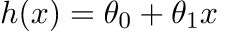

Note: think of h(x) as an imitator of y_i. The function h will try to transform x_i into y_i such that image.png.


Note: we define the "unit error" between an observed value y_i and a predicted value h(x_i), as follows:


  image.png

Finding the best couple image.png and image.png amounts to minimizing the global cost of unit errors which is defined as follows:

 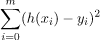 

m is the size of the training set

the cost function :

 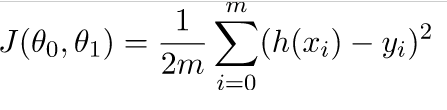

 

Replacing the term h(x) by its value we get :

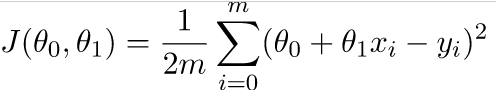

This formula represents the cost function / Error function for univariate linear regression.

**Minimization of the cost function** image.png

One way to calculate the minimum of the cost function image.png is to use the Gradient descent algorithm. The latter is an iterative algorithm that will change, at each iteration, the values of image.png et image.png until we find the best possible couple.

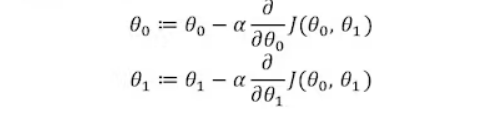

In the definition of the algorithm we notice these two terms:

- The term image.png is called **Learning Rate**: it sets the "size" of the step of each iteration of the Gradient Descent.

- image.png :This term is the partial derivative for each of the terms image.png  and  image.png.

we can calculate the derivative of  image.png  and  image.png

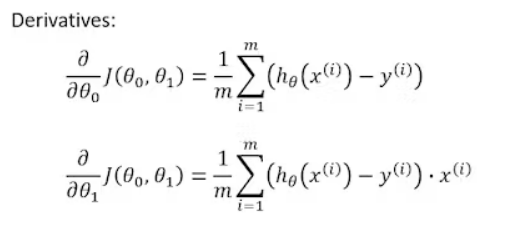

At each iteration, the algorithm will advance one step and find a new pair of  image.png  and  image.png.

 And with each iteration, the overall error cost will get smaller.

#**Conjugate gradient method** 

In numerical analysis, the conjugate gradient method is an algorithm for solving systems of linear equations whose matrix is symmetrically positive definite. 


**The objective** is to minimoze the function 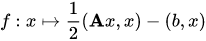 
where A is a positive definite symmetric square matrix of size n.

The calculation shows that a solution of the problem is the solution of the system  image.png : So, we have   image.png

**Uses:**

We use the Conjugate Gradient (CG) method to solve a linear equation or to optimize a quadratic equation. It is more efficient in solving those problems than the gradient descent.
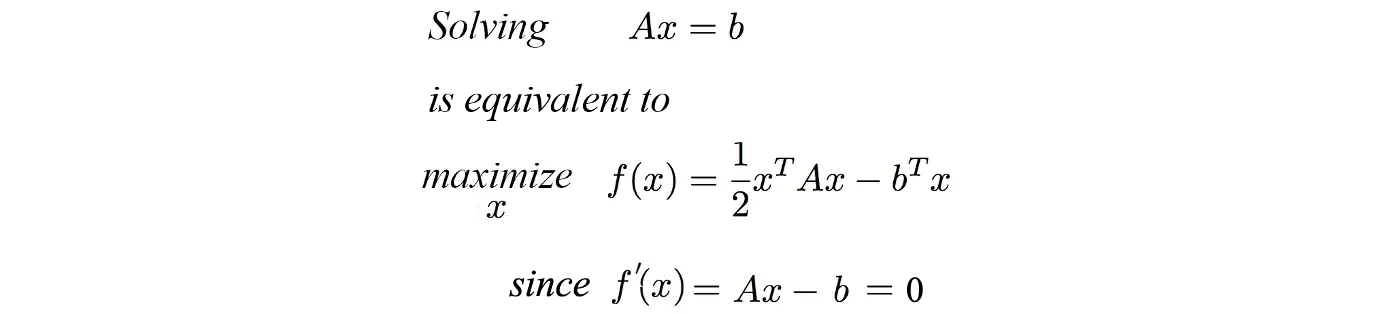

where A is symmetrical and positive definite.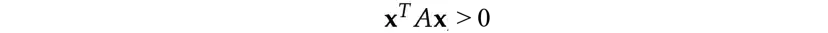


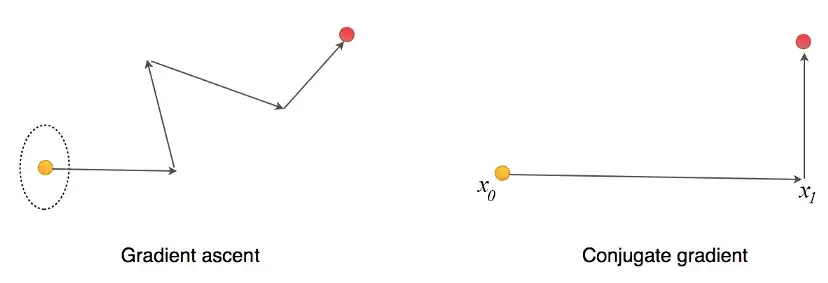

The conjugate gradient method is a line search method but for every move, it would not undo part of the moves done previously. It optimizes a quadratic equation in fewer step than the gradient ascent. If x is N-dimensional (N parameters), we can find the optimal point in at most N steps. For every move, we want a direction conjugate to all previous moves. This guarantees that we do not undo part of the moves we did  In short, if x is 4-dimensional, it should take at most 4 moves to reach the optimal point.


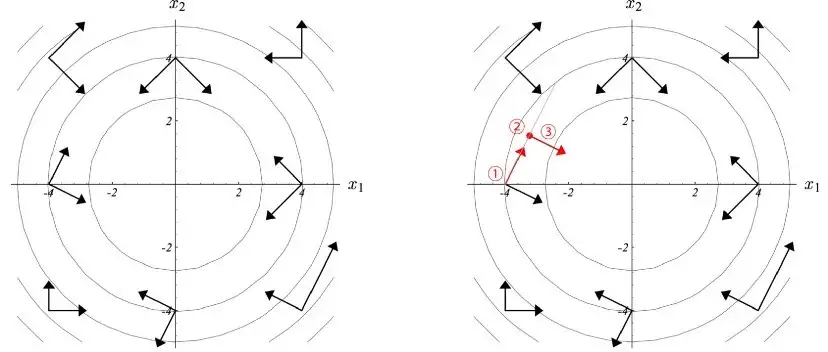

- We start the ascent in one particular direction.

- We settle down in the optimal point for that direction.

- We find a new direction dj which is A-conjugate to any previous moving directions di.

Mathematically, it means any new direction dj must obey the A-conjugate with all previous direction di:

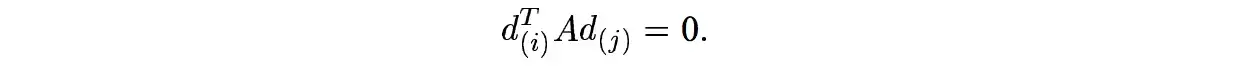

where A is the matrix in the quadratic equation. Here are some other examples of A-conjugate vectors in 2-D space.
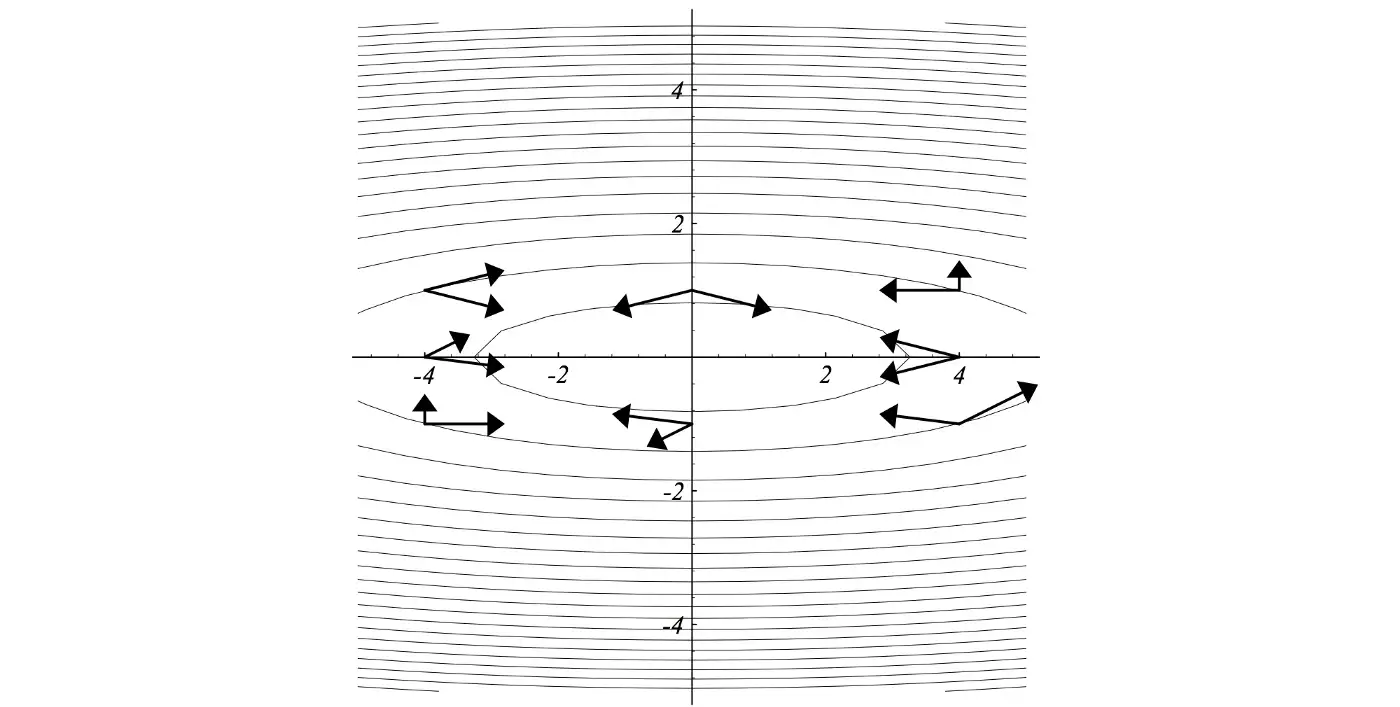

The A-conjugate vectors are independent of each other. Hence, N A-conjugate vectors can span a space of N dimensions.
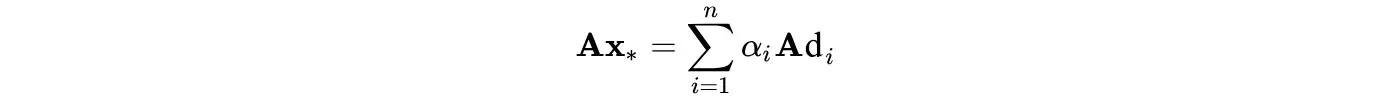

The key part of the  Conjugate Gradient method is to find α and d.

In [ ]:
#@title
%%html
<link rel="stylesheet" type="text/css"
    href="https://cdn.rawgit.com/dreampulse/computer-modern-web-font/master/fonts.css">

<style type="text/css">
div{font-family: "Computer Modern Sans";
font-size:16px;
}
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-bottom-width:1px;border-color:black;border-style:solid;border-top-width:1px;border-width:0px;
   font-family: "Computer Modern Sans", sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-bottom-width:1px;border-color:black;border-style:solid;border-top-width:1px;border-width:0px;
   font-family: "Computer Modern Sans", sans-serif;font-size:15px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-y14w{border-color:inherit;font-family: "Computer Modern Sans"!important;font-size:15px;text-align:left;vertical-align:top}
.tg .tg-rxs6{border-color:#343434;font-family: "Computer Modern Sans"!important;font-size:15px;font-weight:bold;text-align:left;
  vertical-align:top}
.tg .tg-w7iv{background-color:#efefef;border-color:inherit; font-family: "Computer Modern Sans"!important;font-size:15px;text-align:left;
  vertical-align:top}
.tg .tg-ogqf{border-color:#000000; font-family: "Computer Modern Sans"!important;font-size:15px;font-weight:bold;text-align:left;
  vertical-align:top}
</style>

  <br>
</div>
<table class="tg">
<thead>
  <tr>
    <th class="tg-ogqf">  Benefits of Conjugate Gradient:</th>
    <th class="tg-rxs6">Drawbacks of Conjugate Gradient:</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-w7iv">CG is faster than Gradient Descent for large, sparse, and symmetric positive definite matrices.</td>
    <td class="tg-w7iv">CG requires the matrix A to be symmetric positive definite, which can be a limitation for some problems.</td>
  </tr>
  <tr>
    <td class="tg-y14w">CG uses a conjugate direction for each iteration, which makes the algorithm converge faster than Gradient Descent.</td>
    <td class="tg-y14w">CG can be sensitive to the choice of the initial guess, which can slow down the convergence.</td>
  </tr>
  <tr>
    <td class="tg-w7iv">CG is able to find the exact minimum of a function for a symmetric positive definite matrix, unlike Gradient Descent which only finds a local minimum.</td>
    <td class="tg-w7iv">CG can be sensitive to the choice of the step size, which can slow down the convergence.</td>
  </tr>
</tbody>
</table>

Benefits of Conjugate Gradient:,Drawbacks of Conjugate Gradient:
"CG is faster than Gradient Descent for large, sparse, and symmetric positive definite matrices.","CG requires the matrix A to be symmetric positive definite, which can be a limitation for some problems."
"CG uses a conjugate direction for each iteration, which makes the algorithm converge faster than Gradient Descent.","CG can be sensitive to the choice of the initial guess, which can slow down the convergence."
"CG is able to find the exact minimum of a function for a symmetric positive definite matrix, unlike Gradient Descent which only finds a local minimum.","CG can be sensitive to the choice of the step size, which can slow down the convergence."




---



First, let’s understand the differences between a hyperparameter and a parameter in machine learning.
* ***Model parameters***:  These are the parameters that are ***estimated by the model*** from the given data. For example the weights of a deep neural network. 
* ***Model hyperparameters***: These are the parameters that ***cannot be estimated by the model*** from the given data. These parameters are used to estimate the model parameters. For example, the learning rate in deep neural networks.

In [ ]:
#@title
%%html
<link rel="stylesheet" type="text/css"
    href="https://cdn.rawgit.com/dreampulse/computer-modern-web-font/master/fonts.css">

<style type="text/css">
div{font-family: "Computer Modern Sans";
font-size:16px;
}
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-bottom-width:1px;border-color:black;border-style:solid;border-top-width:1px;border-width:0px;
   font-family: "Computer Modern Sans", sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-bottom-width:1px;border-color:black;border-style:solid;border-top-width:1px;border-width:0px;
   font-family: "Computer Modern Sans", sans-serif;font-size:15px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-y14w{border-color:inherit;font-family: "Computer Modern Sans"!important;font-size:15px;text-align:left;vertical-align:top}
.tg .tg-rxs6{border-color:#343434;font-family: "Computer Modern Sans"!important;font-size:15px;font-weight:bold;text-align:left;
  vertical-align:top}
.tg .tg-w7iv{background-color:#efefef;border-color:inherit; font-family: "Computer Modern Sans"!important;font-size:15px;text-align:left;
  vertical-align:top}
.tg .tg-ogqf{border-color:#000000; font-family: "Computer Modern Sans"!important;font-size:15px;font-weight:bold;text-align:left;
  vertical-align:top}
</style> 
<table class="tg">
<thead>
  <tr>
    <th class="tg-ogqf">Parameters</th>
    <th class="tg-rxs6">Hyperparameters</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-w7iv">They are required for making predictions</td>
    <td class="tg-w7iv">They are required for estimating the model parameters</td>
  </tr>
  <tr>
    <td class="tg-y14w">They are estimated by optimization algorithms(Gradient Descent, Adam, Adagrad)</td>
    <td class="tg-y14w">They are estimated by hyperparameter tuning</td>
  </tr>
  <tr>
    <td class="tg-w7iv">They are not set manually</td>
    <td class="tg-w7iv">They are set manually</td>
  </tr>
  <tr>
    <td class="tg-y14w">The final parameters found after training will decide how the model will perform on unseen data</td>
    <td class="tg-y14w">The choice of hyperparameters decide how efficient the training is.<br>In gradient descent the learning rate decide how efficient and accurate the optimization process is in estimating the parameters</td>
  </tr>
</tbody>
</table>

Parameters,Hyperparameters
They are required for making predictions,They are required for estimating the model parameters
"They are estimated by optimization algorithms(Gradient Descent, Adam, Adagrad)",They are estimated by hyperparameter tuning
They are not set manually,They are set manually
The final parameters found after training will decide how the model will perform on unseen data,The choice of hyperparameters decide how efficient the training is.In gradient descent the learning rate decide how efficient and accurate the optimization process is in estimating the parameters


***Hyperparameter tuning*** is the process of systematically searching for the best combination of hyperparameters for a machine learning model.

***Hyperparameter tuning methods*** :





In [ ]:
#@title
%%html
<link rel="stylesheet" type="text/css"
    href="https://cdn.rawgit.com/dreampulse/computer-modern-web-font/master/fonts.css">

<style type="text/css">
.row{
  font-family: "Computer Modern Sans"
}
.column1 {
  float: left;
  width: 47%;
  font-size:17px;

}
.column2 {
  float: right;
  width: 47%;
  font-size:17px;
  padding-left:10px;
}
</style>

<div class="row"> 
  <div class="column1">
  <div style='font-weight: bold'>☛ Grid Search (a)</div>
  we create a grid of possible values for hyperparameters. Each iteration tries a combination of hyperparameters in a specific order. It fits the model on each and every combination of hyperparameters possible and records the model performance. Finally, it returns the best model with the best hyperparameters.</div>
  
  <div class="column2">
  <div style='font-weight: bold'>☛ Random Search (b)</div>
  we create a grid of possible values for hyperparameters. Each iteration tries a random combination of hyperparameters from this grid, records the performance, and lastly returns the combination of hyperparameters that provided the best performance.
  </div>
</div>

> 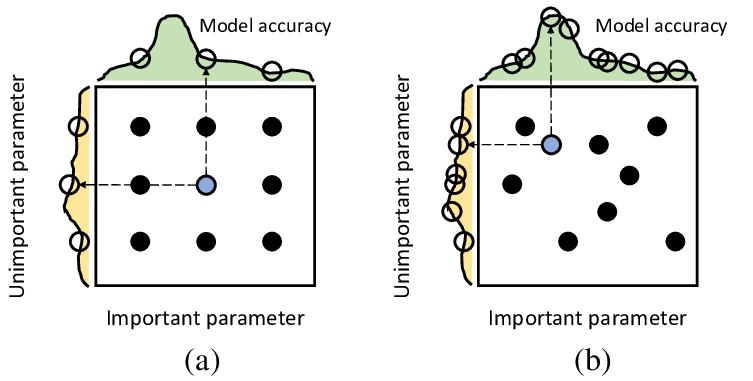

In [ ]:
#@title
%%html
<link rel="stylesheet" type="text/css"
    href="https://cdn.rawgit.com/dreampulse/computer-modern-web-font/master/fonts.css">

<style type="text/css">
div{font-family: "Computer Modern Sans";
font-size:16px;
}
tr {
   border-bottom: 1px solid #ddd;
}
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-bottom-width:1px;border-color:black;border-style:solid;border-top-width:1px;border-width:0px;
   font-family: "Computer Modern Sans", sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-bottom-width:1px;border-color:black;border-style:solid;border-top-width:1px;border-width:0px;
   font-family: "Computer Modern Sans", sans-serif;font-size:15px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-y14w{border-color:inherit;font-family: "Computer Modern Sans"!important;font-size:15px;text-align:left;vertical-align:top}
.tg .tg-rxs6{border-color:#343434;font-family: "Computer Modern Sans"!important;font-size:15px;font-weight:bold;text-align:left;
  vertical-align:top}
.tg .tg-w7iv{border-color:inherit; font-family: "Computer Modern Sans"!important;font-size:15px;text-align:left;
  vertical-align:top}
.tg .tg-ogqf{border-color:black; font-family: "Computer Modern Sans"!important;font-size:15px;font-weight:bold;text-align:left;
  vertical-align:top}
</style> 
<table class="tg">
<thead>
  <tr>
    <th></th>
    <th class="tg-ogqf">Grid Search</th>
    <th class="tg-rxs6">Random Search</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>Benefits</td>
    <td class="tg-w7iv">
     <li> Guaranteed to find the best set of hyperparameters if the search space is small enough and the search is run for long enough.</li>
      <li>Can be useful when the number of hyperparameters is small and the range of possible values for each hyperparameter is limited.</li>
    </td>
    <td class="tg-w7iv">
     <li> Computationally less expensive than Grid search.</li>
      <li>Often requires fewer iterations to find a good set of hyperparameters.</li>
    </td>
  </tr>
    <tr>
    <td class="tg-y14w">Drawbacks</td>
    <td class="tg-y14w">
      <li>Computationally expensive, especially when the number of hyperparameters and the number of possible values for each hyperparameter is high.</li>
      <li>Can be very time-consuming.</li>
    </td>
    <td class="tg-y14w">
      <li>Does not guarantee to find the best set of hyperparameters, it relies on randomness.</li>
      <li>May take longer to find an optimal solution than Grid search.</li>
      <li>It's not always clear how many iterations are needed to find the best set of hyperparameters.</li>
    </td>
  </tr>

,Grid Search,Random Search
Benefits,Guaranteed to find the best set of hyperparameters if the search space is small enough and the search is run for long enough. Can be useful when the number of hyperparameters is small and the range of possible values for each hyperparameter is limited.,Computationally less expensive than Grid search. Often requires fewer iterations to find a good set of hyperparameters.
Drawbacks,"Computationally expensive, especially when the number of hyperparameters and the number of possible values for each hyperparameter is high. Can be very time-consuming.","Does not guarantee to find the best set of hyperparameters, it relies on randomness. May take longer to find an optimal solution than Grid search. It's not always clear how many iterations are needed to find the best set of hyperparameters."


In [ ]:
#@title
%%HTML
<link rel="stylesheet" type="text/css"
    href="https://cdn.rawgit.com/dreampulse/computer-modern-web-font/master/fonts.css">
<style>
.alert {
  font-family: "Computer Modern Sans", sans-serif;
  padding: 20px;
  background-color: #A2331B; /* Red */
  color: white;
  font-size:16px;
  margin-right:30%;
  margin-bottom: 15px;  }
</style>
<div class="alert"> 
 ! When performing Hyperparameter tuning, we need to define the model that we want to tune the hyperparameters for. The Hyperparameter tuning algorithm will use this model to train and evaluate different combinations of hyperparameters.
</div>

***Optimization Algorithm***:

###1- Variations of Gradient Descent:

>#### *i*-  Batch gradient descent:

> computes the gradient of the cost function to the parameters θ for the entire training dataset:

> > θ = θ − η ⋅ $∇_θ$ J(θ)


```python
for i in range(nb_epochs):
  params_grad = evaluate_gradient(loss_function, data, params)
  params = params - learning_rate * params_grad
```



>#### *ii*-  Stochastic gradient descent:

> Stochastic gradient descent (SGD) in contrast performs a parameter update for each training example $x^{(i)}$ and label $y^{(i)}$:

> > θ = θ − η ⋅ $∇_θ$ J(θ;$x^{(i)}$;$y^{(i)}$)

``` python
for i in range(nb_epochs):
  np.random.shuffle(data)
  for example in data:
    params_grad = evaluate_gradient(loss_function, example, params)
    params = params - learning_rate * params_grad
```
>#### *iii*-  Mini-batch gradient descent:

> Mini-batch gradient descent finally takes the best of both worlds and performs an update for every mini-batch of n training examples:

> > θ = θ − η ⋅ $∇_θ$ J(θ;$x^{(i:i+n)}$;$y^{(i:i+n)}$)

```python
for i in range(nb_epochs):
  np.random.shuffle(data)
  for batch in get_batches(data, batch_size=50):
    params_grad = evaluate_gradient(loss_function, batch, params)
    params = params - learning_rate * params_grad
```

> **+ Faster and less computationally expensive than Batch GD and can be used on larger training samples**

> **+ Can escape shallow local minima more easily.**




> 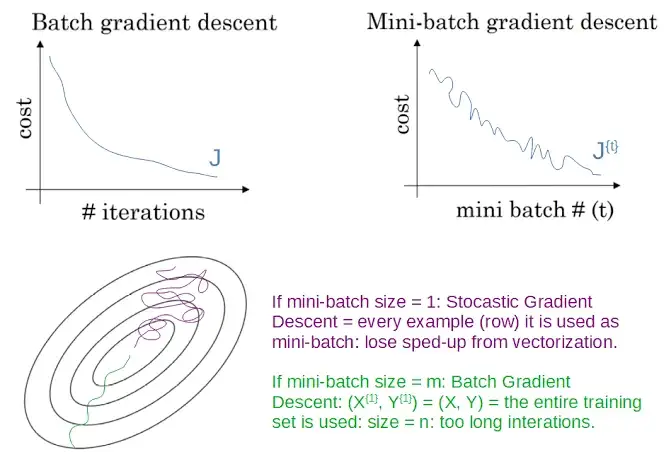

>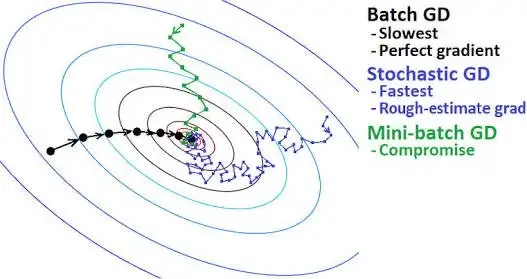

 **❕** However, the randomness introduced by the sampling can make the optimization converge slower or even diverge, which is why it is common to use a learning rate schedule or momentum to mitigate these issues.

In [ ]:
#@title
%%html
<link rel="stylesheet" type="text/css"
    href="https://cdn.rawgit.com/dreampulse/computer-modern-web-font/master/fonts.css">

<style type="text/css">
div{font-family: "Computer Modern Sans";
font-size:20px;

}
def{
    padding-left:20px;
    font-size:16px;
}
</style>
<div>
  <optimizer>iv- Momentum
  </optimizer>
  <br>
<def>
      • With Stochastic Gradient Descent we don’t compute the exact derivate of our loss function. Instead, we’re estimating it on a small batch. Which means we’re not always going in the optimal direction, because our derivatives are ‘noisy’. Just like in my graphs above. So, exponentially weighed averages can provide us a better estimate which is closer to the actual derivate than our noisy calculations. This is one reason why momentum might work better than classic SGD.<br>
      </def><def>• The other reason lies in ravines. Ravine is an area, where the surface curves much more steeply in one dimension than in another. Ravines are common near local minimas in deep learning and SGD has troubles navigating them. SGD will tend to oscillate across the narrow ravine since the negative gradient will point down one of the steep sides rather than along the ravine towards the optimum. Momentum helps accelerate gradients in the right direction. <br>
     </def><def>➯ This technique modifies the standard SGD by introducing velocity v
 , which is the parameter we are trying to optimize, and friction μ
, which tries to control the velocity and prevents overshooting the valley while allowing faster descent. The gradient only has direct influence on the velocity, which in turn has an effect on the position. 
<br>
</def>
Mathematically:
</div>

\begin{align}
v(t) = \beta * v(t-1) + (1 - \beta) * grad \\
\theta(t+1) = \theta(t) - \alpha * v(t)
\end{align}
\begin{array}{cc}
Where \\\hline
v(t)& \hbox{the momentum vector, which is the moving average of the gradients}\\
\beta & \hbox{the momentum coefficient, typically set to 0.9}\\
grad & \hbox{the gradient of the loss function with respect to the parameters}\\
\alpha & \hbox{the learning rate}\\
\theta(t) & \hbox{the current value of the parameters}\\
\end{array}

In [ ]:
#@title
%%html
<link rel="stylesheet" type="text/css"
    href="https://cdn.rawgit.com/dreampulse/computer-modern-web-font/master/fonts.css">

<style type="text/css">
div{font-family: "Computer Modern Sans";
font-size:20px;

}
def{
    padding-left:20px;
    font-size:16px;
}
mat{

    font-size:17px;
}
</style>
<div>
  <optimizer>v- AdaGrad
  </optimizer>
  <br>
<def>➯ keeps track of per parameter sum of squared gradient and normalizes parameter update step. The idea is that parameters which receive big updates will have their effective learning rate reduced, while parameters which receive small updates will have their effective learning rate increased. This way we can accelerate the convergence by accelerating per parameter learning.<br>
</def>

<mat>Mathematically:

</mat>
</div>

\begin{align}
G(t) = G(t-1) + grad^2 \\
\theta(t+1) = \frac{\theta(t) - \alpha * grad}  {\sqrt(G(t) + \epsilon})
\end{align}
\begin{array}{cc}
Where \\\hline
G(t)& \hbox{the sum of the squares of the gradients with respect to the parameters up to time step t}\\
grad & \hbox{the gradient of the loss function with respect to the parameters}\\
\alpha & \hbox{the learning rate}\\
\theta(t) & \hbox{the current value of the parameters}\\
\epsilon & \hbox{a small value added for numerical stability}\\
\end{array}

In [ ]:
#@title
%%html
<link rel="stylesheet" type="text/css"
    href="https://cdn.rawgit.com/dreampulse/computer-modern-web-font/master/fonts.css">

<style type="text/css">
div{font-family: "Computer Modern Sans";
font-size:20px;

}
def{
    padding-left:20px;
    font-size:16px;
}
mat{

    font-size:17px;
}
</style>
<div>
  <optimizer>vi- RMSprop (Root Mean Square Propagation)
  </optimizer>
  <br>
  <def>
      A disadvantage of AdaGrad is that cache[i] += grad[i]**2 part of the update is monotonically increasing. This can pose problems because the learning rate can steadily decrease to the point where it stops the learning altogether.
  </def><br>
<def>➯  it uses a moving average instead of accumulating all previous squared gradients. <br>
</def>

<mat>Mathematically:

</mat>
</div>

\begin{align}
v(t+1) = \beta * v(t) + (1 - \beta) * grad^2 \\
\theta(t+1) = \frac {\theta(t) - \alpha * grad } {\sqrt(v(t+1) + \epsilon)}
\end{align}
\begin{array}{cc}
where\\ \hline
v(t)& \hbox{the moving average of the squared gradient}\\
\beta & \hbox{the decay rate, typically set to 0.9}\\
grad & \hbox{the gradient of the loss function with respect to the parameters}\\
\alpha & \hbox{the learning rate}\\
\theta(t) & \hbox{the current value of the parameters}\\
\epsilon & \hbox{a small value added for numerical stability}\\
\end{array}

In [ ]:
#@title
%%html
<link rel="stylesheet" type="text/css"
    href="https://cdn.rawgit.com/dreampulse/computer-modern-web-font/master/fonts.css">

<style type="text/css">
div{font-family: "Computer Modern Sans";
font-size:20px;

}
def{
    padding-left:20px;
    font-size:16px;
}
mat{

    font-size:17px;
}
</style>
<div>
  <optimizer>vii- Adam (Adaptive Moment Estimation) 
  </optimizer>
  <br>
  <def>
     RMSprop only uses the moving average of the squared gradient to scale the learning rate, but it doesn't use the historical gradient information to adjust the learning rate.
  </def><br>
<def>➯  Adam addresses this issue by introducing a second moment term, which is the moving average of the gradient.Additionally, Adam also uses a bias-correction term to correct for the initial values of the moving averages. <br>
</def>
<def>➯ It is an extension of the stochastic gradient descent algorithm and combines the benefits of both Adagrad and RMSprop.
</def>
<br>
<mat>Mathematically:

</mat>
</div>

\begin{align}
m_t &= \beta_1 * m_{t-1} + (1 - \beta_1) * grad \\
v_t &= \beta_2 * v_{t-1} + (1 - \beta_2) * grad^2 \\
\hat{m_t} &= \frac{ m_t } {(1 - \beta_1^t)} \\
\hat{v_t} &= \frac{v_t } {(1 - \beta_2^t)} \\
\theta_t &= \frac{\theta_{t-1} - \alpha * \hat{m_t}} { (\sqrt{\hat{v_t}} + \epsilon)}
\end{align}
\begin{array}{cc}
where\\ \hline
m_t, v_t& \hbox{ the first and second moment estimates, respectively}\\
\hat{m_t},\hat{v_t} & \hbox{the bias-corrected versions of } m_t{ and }{ v_t}\\
\theta_t & \hbox{the updated parameter value}\\
\beta_1,\beta_2 & \hbox{the decay rates for the first and second moment estimates, respectively ( typically 0.9 and 0.999)}\\
t & \hbox{the iteration number}\\
\epsilon & \hbox{small value added to the denominator to avoid dividing by zero}\\
\end{array}

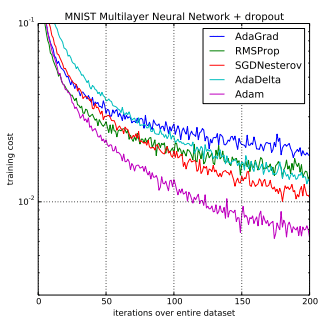

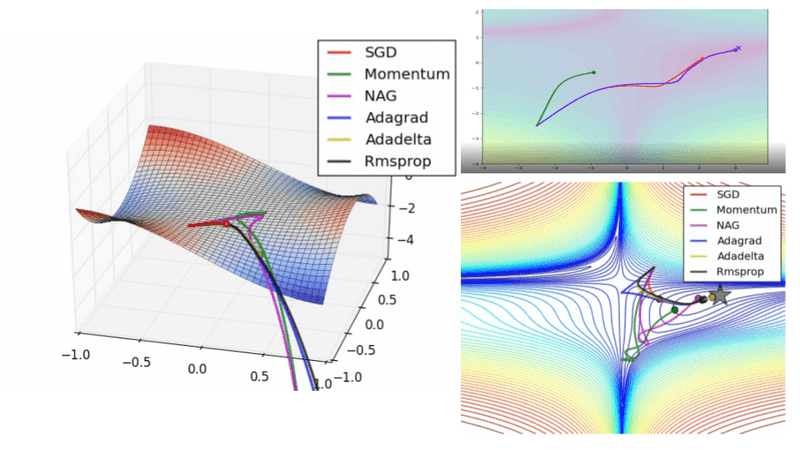

In [ ]:
#@title
from IPython.display import HTML
HTML('<img src="https://ruder.io/content/images/2016/09/saddle_point_evaluation_optimizers.gif">')

In [ ]:
#@title
from IPython.display import HTML
HTML('<img src="https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcSKIGH%2FbtqT90rmzbL%2FpkmZUvubjhB01yTrVFlrQK%2Fimg.gif">')



---



**GENETIC ALGORITHM**

**Genetic algorithms** are a **type of optimization algorithm**, meaning they are used to find the optimal solution(s) to a given computational problem that maximizes or minimizes a particular function. 

Genetic algorithms represent one branch of the **field of study called evolutionary computation**, in that they imitate the biological processes of reproduction and natural selection to solve for the ‘fittest’ solutions. 


Genetic algorithms can simultaneously test many points from all over the solution space, optimize with either discrete or continuous parameters, provide several optimum parameters instead of a single solution, and work with many different kinds of data. These advantages allow genetic algorithms to “produce stunning results when traditional optimization methods fail miserably”.


**Components - Operators**

• a fitness function for optimization 

• a population of chromosomes 

• selection of which chromosomes will reproduce 

• crossover to produce next generation of chromosomes 

• random mutation of chromosomes in new generation



The term **chromosome** refers to a numerical value or values that represent a candidate solution to the problem that the genetic algorithm is trying to solve. Each candidate solution is encoded as an array of parameter values
Chromosome = $[ p_1,p_2,…,p_Npar]$

Historically, chromosomes were typically encoded in a sequence of 0 and 1, modern computers allow chromosomes to include permutations, real numbers, and many other objects.

A genetic algorithm begins with a randomly chosen assortment of chromosomes, which serves as the first generation (initial population). Then each chromosome in the population is evaluated by the **fitness function** to test how well it solves the problem at hand. 

The **selection operator** chooses some of the chromosomes for reproduction based on a probability distribution defined by the user. The fitter a chromosome is, the more likely it is to be selected.

Selection procedures can be broadly classified into two classes: fitness proportionate selection and ordinal selection.

The first one includes methods such as roulette-wheel selection and stochastic universal selection. The roulette-wheel selection scheme can be implemented as follows :

If *f* a fitness function, 

1.Then compute the probabaility of selecting each member of the population :

\begin{align}
       P(k) = \mid \frac{f(k)}{\sum_{i=1}^{Npop} f(i)} | 
    \end{align}

2.Calculate the cumulative probability, qk, for each individual  

\begin{align}
q_k={\sum_{i=1}^{k} f(i)}
    \end{align}

3.Generate an uniform random number, r ∈ (0,1].

4.If r < q1 then select the first chromosome, x1, else select the individual xk such that qk−1 < r ≤ qk.

5.Repeat steps 3–4 n times to create n candidates in the mating pool.

The **crossover operator** (recombination) swaps a subsequence of two of the chosen chromosomes to create two offspring.
Many crossover methods have been designed : one Point crossover, Two point crossover, uniform crossover, cycle crossover.....


The **mutation** operator randomly flips individual bits in the new chromosomes.

The mutation operator may seem unnecessary. In fact, it plays an important role, even if it is secondary to those of selection and crossover. Selection and crossover maintain the genetic information of fitter chromosomes, but these chromosomes are only fitter relative to the current generation. This can cause the algorithm to converge too quickly and lose “potentially useful genetic material. In other words, the algorithm can get stuck at a local optimum before finding the global optimum. The mutation operator helps protect against this problem by maintaining diversity in the population, but it can also make the algorithm converge more slowly.

Now the second generation is tested by the fitness function, and the cycle repeats. It is a common practice to record the chromosome with the highest fitness from each generation, or the “best-so-far” chromosome. 

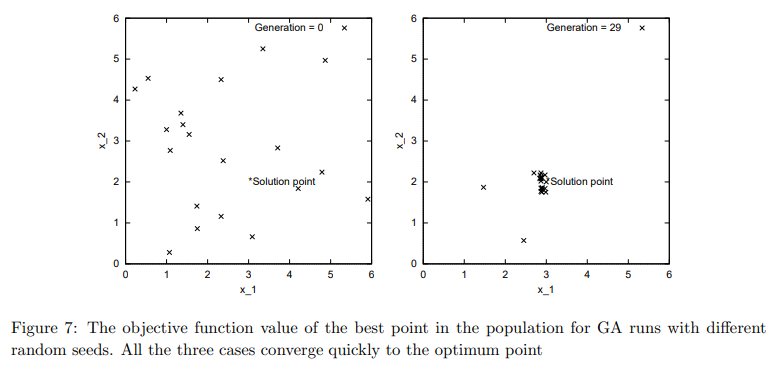


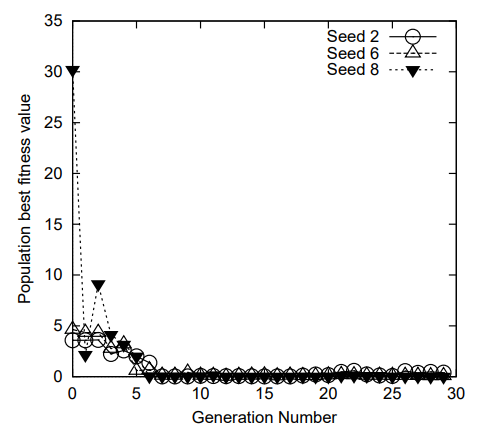


Genetic algorithms are iterated until the fitness value of the “best-so-far” chromosome stabilizes and does not change for many generations.

The “performance” of a genetic algorithm depends highly on the method used to encode candidate solutions into chromosomes and “the particular criterion for success,” or what the fitness function is actually measuring. Other important details are the probability of crossover, the probability of mutation, the size of the population, and the number of iterations. These values can be adjusted after assessing the algorithm’s performance on a few trial runs.


---

**ARTIFICIAL BEE COLONY ALGORITHM**

Is a swarm based meta-heuristic algorithm that was introduced by Karaboga in 2005. For optimizing numerical problems. It was inspired by the intelligent foraging behavior of honey bees.
The artificial bee algorithm contains three groups :

• Scouts

• Onlookers

• Employed bees

In ABC, a colony of artificial forager bees (agents) search for rich artificial food sources (good solutions for a given problem). To apply ABC, the considered optimization problem is first converted to the problem of finding the best parameter vector which minimizes an objective function.	  
Then, the artificial bees randomly discover a population of initial solution vectors and then iteratively improve them by employing the strategies : moving towards better solutions by means of a neighbour search mechanism while abandoning poor solutions.

The general scheme of the ABC algorithm is as follows :

---

Intialization Phase 

REPEAT 

 Employed Bees Phase

  Onlooker Bees Phase

  Scout Bees Phase

  Memorize the best solution achieved so far

UNTIL (Cycle=Maximum Cycle Number or a Maximum CPU time)

---



**1.Initialization**

The ABC generates a randomly ditributed initial population of SN solutions (food source position where SN : size of population). 

Each $(x_m ) ⃗(m=1, 2,…SN)$ is a D-dimensional solution vector to the optimization problem. 
Each $(x_m ) ⃗$ holds n variables $x_mi (i=1,..n)$, which are to be optimized so as to minimize the objective function.

The following definition might be used for initialization purposes :
$x_mi=l_i+rand(0,1)*(u_i-l_i)$

Where $l_i$ and $u_i$ are the lower and upper bound of the parameter x_mi, respectively.


**2.Employed Bees Phase**

Employed bees search for new food sources $(v_m ) ⃗$   having more nectar within the neighbourhood of the food source $(x_m ) ⃗$ in their memory.

They find a neighbour food source and then evaluate its profitability (fitness). For example, they can determine a neighbour food source (v_m ) ⃗    using the formula given by equation :

$v_mi=x_mi+ϕ_mi (x_mi-x_ki)$

After producing the new food source  $(v_m ) ⃗$     , its fitness is calculated and a greedy selection is applied between $(v_m ) ⃗$    and$ (x_m ) ⃗ $.

The fitness value of the solution, $fit_m ( x_m ) ⃗  $  , might be calculated for minimization problems using the following formula :

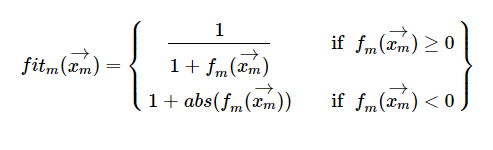






where $f_m  (x_m ) ⃗ $ is the objective function value of solution $(( x_m ) ⃗  )$


**3.Onlooker Bees Phase**

Unemployed bees consist of two groups of bees : onlooker bees and scouts. Employed bees share their food source information with onlooker bees waiting in the hive and then onlooker bees probabilistically choose their food sources depending on this information. In ABC, an onlooker bee chooses a food source depending on the probability values calculated using the fitness values provided by employed bees. For this purpose, a fitness based selection technique can be used, such as the roulette wheel selection method (Goldberg, 1989). ( procedure used for selection phase in genetic algo).

The probability value p_m with which $(x_m ) ⃗$ is chosen by an onlooker bee can be calculated by using the expression given in equation :

\begin{align}
       P(k) = \frac{fit_m  (x_m ) ⃗ }{\sum_{m=1}^{SN}fit_m  (x_m ) ⃗}
    \end{align}

After a food source $(x_m ) ⃗$ for an onlooker bee is probabilistically chosen, a neighbourhood source $(v_m ) ⃗$ is determined by using equation 1, and its fitness value is computed. As in the employed bees phase, a greedy selection is applied between $(v_m ) ⃗$ and $(x_m ) ⃗$. Hence, more onlookers are recruited to richer sources and positive feedback behaviour appears.


**4.Scout Bees Phase**

The unemployed bees who choose their food sources randomly are called scouts. Employed bees whose solutions cannot be improved through a predetermined number of trials, specified by the user of the ABC algorithm and called “limit” or “abandonment criteria” herein, become scouts and their solutions are abandoned. Then, the converted scouts start to search for new solutions, randomly. 

For instance, if solution $(x_m ) ⃗$  has been abandoned, the new solution discovered by the scout who was the employed bee of $(x_m ) ⃗ $ can be defined by  
$x_mi=l_i+rand(0,1)*(u_i-l_i)$

Hence those sources which are initially poor or have been made poor by exploitation are abandoned and negative feedback behaviour arises to balance the positive feedback.


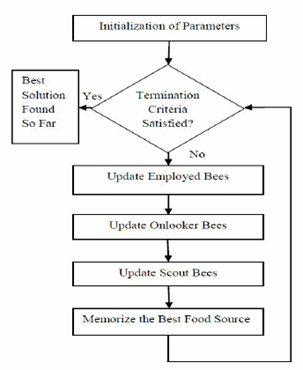

**Advantages**

* Is a global optimization algorithm
* Employs only three control parameters (population size, maximum cycle number and limit) that are to be predetermined by the user
* Is quite simple, flexible and robust...


**Disadvantages**

* Search space limited by initial solution (normal distribution sample should be initialize step)

---

**ANT COLONY OPTIMIZATION ALGORITHM**

Ant colony optimization (ACO) is a population-based metaheuristic that can be used to solve computational problems which can be reduced to find approximate solutions to difficult optimization problems.

In ACO, a set of software agents called artificial ants search for good solutions to a given optimization problem. To apply ACO, the optimization problem is transformed into the problem of finding the best path on a weighted graph. The artificial ants (hereafter ants) incrementally build solutions by moving on the graph. The solution construction process is stochastic and is biased by a pheromone model, that is, a set of parameters associated with graph components (either nodes or edges) whose values are modified at runtime by the ants.


**Explaining ACO through an example**

Traveling salesman problem	TSP

Ants are traveling from a starting location to the final, visiting all cities. We can imagine they return using the same paths, and deposit pheromone(chemicals) on the way back. They deposit more pheromone on shorter distances, then long ones, and only on the path they traveled. An individual ant makes decisions on what city to go to based on level of pheromone on the path and the distance to the nearest city.

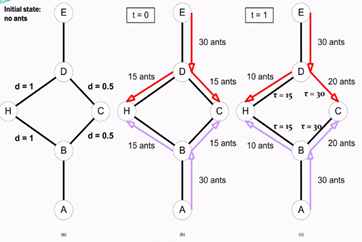

**Ant system**

Ant system (AS) was the first ACO algorithm to be proposed in the literature (Dorigo et al. 1991, Dorigo 1992, Dorigo et al. 1996). Its main characteristic is that the pheromone values are updated by all the ants that have completed the tour. Solution components $ cij $ are the edges of the graph, and the pheromone update for $τij$, that is, for the pheromone associated to the edge joining cities $i$ and $j$, is performed as follows :

\begin{align}
       τij←(1-ρ)⋅τij+{\sum_{k=1}^{m}∆τij^k}
    \end{align}

Where $ρ∈ [0,1]$ is the evaporation rate, m is the number of ants, and Δτkij is the quantity of pheromone laid on edge (i,j) by the k-th ant:



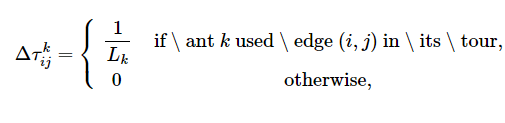


where $L_k$ is the tour length of the k-th ant.

When constructing the solutions, the ants in AS traverse the construction graph and make a probabilistic decision at each vertex. The transition probability $p(cij|s_p^k)$ of the k-th ant moving from city i to city j is given by:


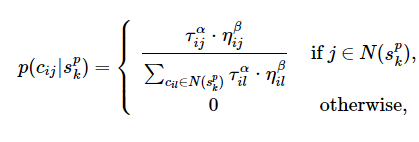

where $N(s_p^k)$ is the set of components that do not belong yet to the partial solution $s_p^k$ of ant k , and $α$ and $β$ are parameters that control the relative importance of the pheromone versus the heuristic information $ηij=1/dij$ , where $dij$ is the length of component $cij$ (i.e., of edge (i,j)).

---

### C- Applications in python

**gradient descent**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from google.colab import drive

drive.mount('/content/drive')
df1 = pd.read_csv('/content/drive/My Drive/datasetMathAI/Advertising.csv')
df1.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
X=df1[['TV','radio','newspaper']]
Y=df1['sales']
Y=np.array((Y-Y.mean())/Y.std())
X=X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)

In [ ]:
import random
def initialize(dim):
  b=random.random()
  theta=np.random.rand(dim)
  return b,theta
b,theta=initialize(3)
print("Bias: ",b,"Weights: ",theta)

Bias:  0.31198775627827213 Weights:  [0.53519121 0.3634006  0.64229894]


Here, we have created a function named initialise which gives us some random values for bias and weights. We use the library random to give us the random numbers which fits to our needs. The next step is to calculate the output (Y) using these weights and bias.

In [ ]:
def predict_Y(b,theta,X):
  return b + np.dot(X,theta)
Y_hat=predict_Y(b,theta,X)
Y_hat[0:10]

array([ 2.32529259,  0.49426784,  1.19934407,  1.60542434,  1.03858436,
        1.38789291, -0.22082325, -0.50401813, -1.94066019, -0.14079274])

Y_hat is the predicted output value whereas Y will be the actual value. The difference between these will give us our cost function. Which will be calculate in our next function.

In [ ]:
import math
def get_cost(Y,Y_hat):
  Y_resd=Y-Y_hat
  return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y-Y_resd)
Y_hat=predict_Y(b,theta,X)
get_cost(Y,Y_hat)

0.6020557303575029

This is our cost function, and our aim is to reduce this as much as possible to get the most accurate predictions. To get the updated bias and weights we use the gradient descent formula of:

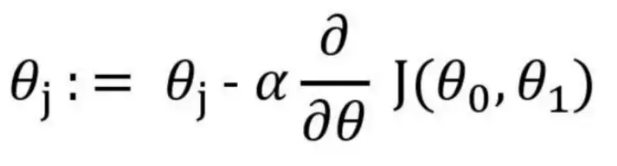

The parameters passed to the function are

- x,y : the input and output variable
- y_hat: predicted value with current bias and weights
- b_0,theta_0: current bias and weights
- Learning rate: learning rate to adjust the update step

In [ ]:
def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
  db=(np.sum(y_hat-y)*2)/len(y)
  dw=(np.dot((y_hat-y),x)*2)/len(y)
  b_1=b_0-learning_rate*db
  theta_1=theta_o-learning_rate*dw
  return b_1,theta_1
print("After initialization -Bias: ",b,"theta: ",theta)
Y_hat=predict_Y(b,theta,X)
b,theta=update_theta(X,Y,Y_hat,b,theta,0.01)
print("After first update -Bias: ",b,"theta: ",theta)
get_cost(Y,Y_hat)

After initialization -Bias:  0.31198775627827213 theta:  [0.53519121 0.3634006  0.64229894]
After first update -Bias:  0.30574800115270667 theta:  [0.53898676 0.36252596 0.63089626]


0.6020557303575029

=> As we can see, the cost function has reduced with the new bias and weights. Currently we are taking the learning rate as 0.001, we will also try with 0.01 to see if it can be a better and more optimal learning rate.

Now that we have created all the required functions we can create a main gradient descent function, which runs them for a particular number of iteration and finds us optimal bias and weights. For this implementation, we are running the function for 200 iterations.

In [ ]:
def run_gradient_descent(X,Y,alpha,num_iterations):
  b,theta=initialize(X.shape[1])
  iter_num=0
  gd_iterations_df=pd.DataFrame(columns=['iteration','cost'])
  result_idx=0
  for each_iter in range(num_iterations):
    Y_hat=predict_Y(b,theta,X)
    this_cost=get_cost(Y,Y_hat)
    prev_b=b
    prev_theta=theta
    b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)
    if(iter_num%10==0):
      gd_iterations_df.loc[result_idx]=[iter_num,this_cost]
      result_idx=result_idx+1
      iter_num +=1
      print("Final Estimate of b and theta : ",b,theta)
    return gd_iterations_df,b,theta
gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=200)

Final Estimate of b and theta :  0.033187694123504356 [0.76375744 0.34456415 0.62086059]


The theta comes as a list of 3 numbers, as we have 3 inputs, chol ,trestbps and thalach.If we print the cost function for each iteration we can see the decrease in the cost function. We can also plot the cost function to iterations to see the result.

In [ ]:
gd_iterations_df[0:10]

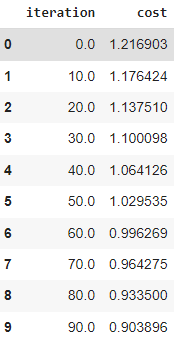

In [ ]:
%matplotlib inline
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
plt.xlabel("Number of iterations")
plt.ylabel("Cost or MSE")

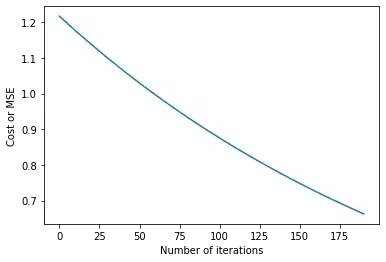

As we can see the cost function decreases with increase in iterations, but we still have not reached convergence. Now, let’s try with α=0.01 for 2000 iterations and compare it with α=0.001 and find which learning rate is better for this dataset.

In [ ]:
alpha_df_1,b,theta=run_gradient_descent(X,Y,alpha=0.01,num_iterations=2000)
alpha_df_2,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=2000)
plt.plot(alpha_df_1['iteration'],alpha_df_1['cost'],label="alpha=0.01")
plt.plot(alpha_df_2['iteration'],alpha_df_2['cost'],label="alpha=0.001")
plt.legend()
plt.ylabel('cost')
plt.xlabel('Number of iterations')
plt.title('Cost Vs. Iterations for different alpha values')

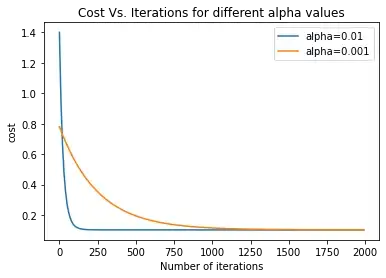

As one can see, 0.01 is the more optimal learning rate as it converges much quicker than 0.001. 0.01 converges around the 100 mark, while 0.001 takes 1000 iterations to reach convergence.

Hence, we have successfully built a gradient descent algorithm on python. Remember, the optimal value of learning rate will be different for each and every dataset.

**Conjugate Gradient Application to solve a system of linear equations**

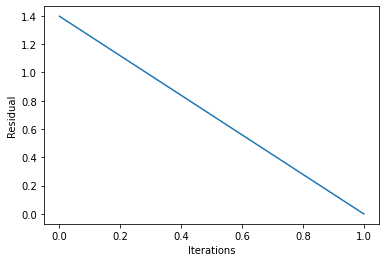

Solution: [0.09090909 0.63636364]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the matrix A
A = np.array([[4, 1], [1, 3]])

# Define the vector b
b = np.array([1, 2])

# Initial guess for the solution
x = np.random.randn(A.shape[1])

# Initial residual
r = b - np.dot(A, x)

# Initial conjugate direction
p = r.copy()

# Tolerance and maximum number of iterations
tol = 1e-6
maxiter = 1000

# Initialize an array to store the residual at each iteration
residuals = []

# Perform Conjugate Gradient iterations
for i in range(maxiter):
    Ap = np.dot(A, p)
    alpha = np.dot(r, r) / np.dot(p, Ap)
    x += alpha * p
    r_new = r - alpha * Ap
    beta = np.dot(r_new, r_new) / np.dot(r, r)
    p = r_new + beta * p
    r = r_new.copy()
    residuals.append(np.linalg.norm(r))
    if np.linalg.norm(r) < tol:
      break

#Plot the residual over time
plt.plot(residuals)
plt.xlabel('Iterations')
plt.ylabel('Residual')
plt.show()

#Print the solution
print("Solution:", x)



The algorithm starts with an initial guess for the solution and calculates the residual,
which is the difference between the actual and the predicted output. 
Next, it calculates the conjugate direction, which is the direction along which the residual is reduced

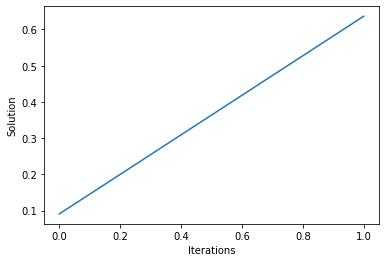

In [ ]:
# Plot the solution over time
plt.plot(x)
plt.xlabel('Iterations')
plt.ylabel('Solution')
plt.show()



---



####**COMPARAISON BETWEEN RANDOM SEARCH AND GRID SEARCH ON A STOCHASTIC GRADIENT DESCENT WITH AN ADAM OPTIMIZER**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from scipy.stats import uniform
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, module="sklearn")

# Define the parameter distribution for the random search
param_dist = {
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'eta0': [0.0001, 0.001, 0.01, 0.1, 1],
}

# Load the heart disease dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the SGDClassifier with the Adam optimizer
clf = SGDClassifier(max_iter=100)

# Create an instance of the RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1)

# Create an instance of the GridSearchCV
grid_search = GridSearchCV(clf, param_grid=param_dist, cv=5)


# Fit the RandomizedSearchCV on the dataset
random_search.fit(X_train, y_train)

# Fit the GridSearchCV on the dataset
grid_search.fit(X_train, y_train)

print('Applying random search and adam optimizer on stochastic gradient descent')
# Print the best parameters and the best score
print('the set of hyperparameters that resulted in the highest mean accuracy: ',random_search.best_params_)
print('the highest mean accuracy achieved during the search: ',random_search.best_score_)

# Use the best estimator to make predictions on the test set
y_pred = random_search.best_estimator_.predict(X_test)

# Print the accuracy on the test set
print('accuracy score of the test set is: ',accuracy_score(y_test, y_pred))

print('Applying Grid search and adam optimizer on stochastic gradient descent')
# Print the best parameters and the best score
print('the set of hyperparameters that resulted in the highest mean accuracy: ',grid_search.best_params_)
print('the highest mean accuracy achieved during the search: ',grid_search.best_score_)

# Use the best estimator to make predictions on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Print the accuracy on the test set
print('accuracy score of the test set is: ',accuracy_score(y_test, y_pred))

As the result above we get that the highest mean accuracy reached by Grid Search is higher than Random Search.
Which boosts the accuracy score of the test set $y_{test}$.



---


**GENETIC ALGORITHM PYTHON**

In [ ]:
pip install pygad

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 KB 11.5 MB/s eta 0:00:00


maximizing an equation $-(x^2 + y^2)$

In [ ]:
#we know that highest possible value is 0,0
import pygad
import numpy
function_inputs = [1,1]
desired_output = 0
def fitness_func(solution, solution_idx):
    output = numpy.sum(-(solution*function_inputs))
    fitness = 1.0 / numpy.abs(output )
    #fitness=1-output
    return fitness


In [ ]:
fitness_function = fitness_func

num_generations = 500
num_parents_mating = 2

sol_per_pop = 4
num_genes = len(function_inputs)

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 10


In [ ]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)
ga_instance.run()


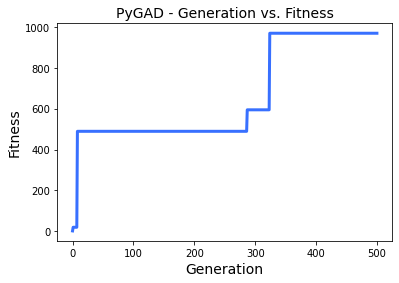

Generation 500. Fitness: (array([-0.54888206,  0.5499145 ]), 968.5864503024468, 0)


In [ ]:
ga_instance.plot_fitness()
print(f"Generation {ga_instance.generations_completed}. Fitness: {ga_instance.best_solution()}")
#Genetic algorithms are iterated until the fitness value of the “best-so-far” chromosome stabilizes and does not change for many generations.

In [ ]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

prediction = numpy.sum(numpy.array(function_inputs)*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))
 #-0.001 is close to 0.0 

Parameters of the best solution : [-0.54888206  0.5499145 ]
Fitness value of the best solution = 968.5864503024468
Predicted output based on the best solution : 0.0010324323654204992




---



**BEE COLONY ALGORITHM**

In [ ]:
pip install pybee

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 KB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 29.0 MB/s eta 0:00:00
  Created wheel for hfilesize: filename=hfilesize-0.1.0-py3-none-any.whl size=3738 sha256=253b4ff302ff2390cbe6d05a86c110d23ef9ebb832d4494fc1c9074723dc8c82
  Stored in directory: /root/.cache/pip/wheels/78/14/2a/ec06d4d559d6fac6e052b2c189f73d9b6d4d488a7a3d8b4b1f
Successfully built hfilesize
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [ ]:
pip install bees-algorithm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from bees_algorithm import BeesAlgorithm

In [ ]:
#we will test the algorithm in sphere equation 
def hypersphere(x):
    return -sum([pow(xi,2) for xi in x])

In [ ]:
search_boundaries=([-5,-5,-5,-5], [5,5,5,5])

This implementation of the bees algorithm will always try to find the solution that maximize the objective function. Therefore, if you have to find the minimum of your function $g(x)$
$f(x)=-g(x)$.

In [ ]:
#The next step is create an instance of the algoritm:
alg = BeesAlgorithm(hypersphere,search_boundaries[0],search_boundaries[1],ns=0,nb=14,ne=1,nrb=5,nre=30,stlim=10)

The algorithm requires a number of parameters to be set, namely: the number of scout bees (ns), number of sites selected out of ns visited sites (nb), number of elite sites out of nb selected sites (ne), number of bees recruited for the best ne sites (nre), number of bees recruited for the other (nb-ne) selected sites (nrb). The heuristics also require the set of the initial size of the patches (ngh) and the number of cycles after which a site is abandoned (stlim). Finally, the stopping criterion must be defined.

The algorithm starts with the ns scout bees being placed randomly in the search space and the main algorithm steps can be summarised as follows:

1. Evaluate the fitness of the population according the objective function;

2. Select the best nb sites for neighbourhood (local) search;

3. Recruit nrb forager bees for the selected sites (nre bees for the best ne sites) and evaluate their fitnesses;

4. Select the fittest bee from each local site as the new site centre;

5. If a site fails to improve in a single local search, its neighbourhood size is reduced (neighbourhood shrinking);

6. If a site fails to improve for stlim cycles, the site is abandoned (site abandonment);

7. Assign the remaining bees to search uniformly the whole search space and evaluate their fitnesses;

8. If the stopping criterion is not met, return to step 2;


In [ ]:
alg.performSingleStep()

-7.787431373862645

In [ ]:
alg.performFullOptimisation(max_iteration=5000)

(5000, -0.0)

In [ ]:
best = alg.best_solution
best.score     


-0.0

In [ ]:
best.values

array([ 1.10669599e-162,  1.38334014e-162,  3.37011739e-163,
       -6.53601148e-163])

---

**ANT COLONY ALGORITHM**

In [ ]:
import numpy as np
from numpy import inf

#given values for the problems

d = np.array([[0,10,12,11,14]
          ,[10,0,13,15,8]
          ,[12,13,0,9,14]
          ,[11,15,9,0,16]
          ,[14,8,14,16,0]])


iteration = 100
n_ants = 5
n_citys = 5

# intialization part

m = n_ants
n = n_citys
e = .5         #evaporation rate
alpha = 1     #pheromone factor
beta = 2       #visibility factor

#calculating the visibility of the next city visibility(i,j)=1/d(i,j)

visibility = 1/d
visibility[visibility == inf ] = 0

#intializing pheromne present at the paths to the cities

pheromne = .1*np.ones((m,n))

#intializing the rute of the ants with size rute(n_ants,n_citys+1) 
#note adding 1 because we want to come back to the source city

rute = np.ones((m,n+1))

for ite in range(iteration):
    
    rute[:,0] = 1          #initial starting and ending positon of every ants '1' i.e city '1'
    
    for i in range(m):
        
        temp_visibility = np.array(visibility)         #creating a copy of visibility
        
        for j in range(n-1):
            #print(rute)
            
            combine_feature = np.zeros(5)     #intializing combine_feature array to zero
            cum_prob = np.zeros(5)            #intializing cummulative probability array to zeros
            
            cur_loc = int(rute[i,j]-1)        #current city of the ant
            
            temp_visibility[:,cur_loc] = 0     #making visibility of the current city as zero
            
            p_feature = np.power(pheromne[cur_loc,:],beta)         #calculating pheromne feature 
            v_feature = np.power(temp_visibility[cur_loc,:],alpha)  #calculating visibility feature
            
            p_feature = p_feature[:,np.newaxis]                     #adding axis to make a size[5,1]
            v_feature = v_feature[:,np.newaxis]                     #adding axis to make a size[5,1]
            
            combine_feature = np.multiply(p_feature,v_feature)     #calculating the combine feature
                        
            total = np.sum(combine_feature)                        #sum of all the feature
            
            probs = combine_feature/total   #finding probability of element probs(i) = comine_feature(i)/total
            
            cum_prob = np.cumsum(probs)     #calculating cummulative sum
            #print(cum_prob)
            r = np.random.random_sample()   #randon no in [0,1)
            #print(r)
            city = np.nonzero(cum_prob>r)[0][0]+1       #finding the next city having probability higher then random(r) 
            #print(city)
            
            rute[i,j+1] = city              #adding city to route 
           
        left = list(set([i for i in range(1,n+1)])-set(rute[i,:-2]))[0]     #finding the last untraversed city to route
        
        rute[i,-2] = left                   #adding untraversed city to route
       
    rute_opt = np.array(rute)               #intializing optimal route
    
    dist_cost = np.zeros((m,1))             #intializing total_distance_of_tour with zero 
    
    for i in range(m):
        
        s = 0
        for j in range(n-1):
            
            s = s + d[int(rute_opt[i,j])-1,int(rute_opt[i,j+1])-1]   #calcualting total tour distance
        
        dist_cost[i]=s                      #storing distance of tour for 'i'th ant at location 'i' 
       
    dist_min_loc = np.argmin(dist_cost)             #finding location of minimum of dist_cost
    dist_min_cost = dist_cost[dist_min_loc]         #finging min of dist_cost
    
    best_route = rute[dist_min_loc,:]               #intializing current traversed as best route
    pheromne = (1-e)*pheromne                       #evaporation of pheromne with (1-e)
    
    for i in range(m):
        for j in range(n-1):
            dt = 1/dist_cost[i]
            pheromne[int(rute_opt[i,j])-1,int(rute_opt[i,j+1])-1] = pheromne[int(rute_opt[i,j])-1,int(rute_opt[i,j+1])-1] + dt   
            #updating the pheromne with delta_distance
            #delta_distance will be more with min_dist i.e adding more weight to that route  peromne

print('route of all the ants at the end :')
print(rute_opt)
print()
print('best path :',best_route)
print('cost of the best path',int(dist_min_cost[0]) + d[int(best_route[-2])-1,0])
   

            
            
            

route of all the ants at the end :
[[1. 2. 5. 4. 3. 1.]
 [1. 2. 5. 4. 3. 1.]
 [1. 2. 5. 4. 3. 1.]
 [1. 2. 5. 4. 3. 1.]
 [1. 2. 5. 4. 3. 1.]]

best path : [1. 2. 5. 4. 3. 1.]
cost of the best path 55


<ipython-input-157-1bc35002a80b>:27: RuntimeWarning: divide by zero encountered in true_divide
  visibility = 1/d


---

In [ ]:
####
###
##
#